In [218]:
import os
import re
import warnings
from copy import deepcopy

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt

plt.style.use('Estilo/toutl.mplstyle')
from style import *


In [219]:
df = pd.read_csv('Datos/examen3.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   client_stayed             10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [239]:
# Versión mejorada para obtener columnas numéricas (excluyendo binarias si es necesario)
columnas_analizar = df.select_dtypes(include=['int64', 'float64']).drop(columns=['clientnum', 'client_stayed'], errors='ignore').columns.tolist()

def generar_reporte_outliers(df, columnas):
    # Cabecera del reporte
    print("\n" + "="*92)
    print(f"{'REPORTE DE OUTLIERS - ANÁLISIS COMPLETO':^92}")
    print("="*92)
    print(f"{'Columna':<25} {'Tipo':<10} {'Outliers':>10} {'%':>8} {'L. Inferior':>15} {'L. Superior':>15}")
    print("-"*92)
    
    for col in columnas:
        # Cálculo de estadísticas
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
        n_outliers = len(outliers)
        pct_outliers = (n_outliers/len(df))*100
        
        # Formateo de números
        str_lim_inf = f"{lim_inf:,.2f}" if isinstance(lim_inf, float) else f"{int(lim_inf):,}"
        str_lim_sup = f"{lim_sup:,.2f}" if isinstance(lim_sup, float) else f"{int(lim_sup):,}"
        
        # Impresión formateada
        print(f"{col:<25} {str(df[col].dtype):<10} {n_outliers:>10,} {pct_outliers:>7.2f}% {str_lim_inf:>15} {str_lim_sup:>15}")
    
    print("="*92)
    print(f"{'Nota: Límites calculados con método IQR (Q1-1.5*IQR, Q3+1.5*IQR)':^92}")
    print("="*92)

# Generar el reporte
generar_reporte_outliers(df, columnas_analizar)



                          REPORTE DE OUTLIERS - ANÁLISIS COMPLETO                           
Columna                   Tipo         Outliers        %     L. Inferior     L. Superior
--------------------------------------------------------------------------------------------
customer_age              float64             0    0.00%           24.50           68.50
dependent_count           int64               0    0.00%           -2.00            6.00
months_on_book            float64           199    1.97%           20.00           52.00
total_relationship_count  int64               0    0.00%            0.00            8.00
months_inactive_12_mon    int64             331    3.27%            0.50            4.50
contacts_count_12_mon     int64             629    6.21%            0.50            4.50
credit_limit              float64           984    9.72%      -10,213.75       23,836.25
total_revolving_bal       int64               0    0.00%       -1,778.50        3,921.50
total_trans_

In [222]:
"""
columna = "customer_age"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para customer_age:", outliers.shape[0])

columna = "months_on_book"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para months_on_book:", outliers.shape[0])

columna = "months_inactive_12_mon"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para months_inactive_12_mon:", outliers.shape[0])

columna = "contacts_count_12_mon"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para contacts_count_12_mon:", outliers.shape[0])

columna = "credit_limit"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para credit_limit:", outliers.shape[0])

columna = "total_trans_amt"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para total_trans_amt:", outliers.shape[0])

columna = "total_trans_ct"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para total_trans_ct:", outliers.shape[0])

df.dtypes
"""

'\ncolumna = "customer_age"\n\nQ1 = df[columna].quantile(0.25)\nQ3 = df[columna].quantile(0.75)\nIQR = Q3 - Q1\n\n\nlimite_inferior = Q1 - 1.5 * IQR\nlimite_superior = Q3 + 1.5 * IQR\n\n\noutliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]\n\n\nprint("Número de outliers para customer_age:", outliers.shape[0])\n\ncolumna = "months_on_book"\n\nQ1 = df[columna].quantile(0.25)\nQ3 = df[columna].quantile(0.75)\nIQR = Q3 - Q1\n\n\nlimite_inferior = Q1 - 1.5 * IQR\nlimite_superior = Q3 + 1.5 * IQR\n\n\noutliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]\n\n\nprint("Número de outliers para months_on_book:", outliers.shape[0])\n\ncolumna = "months_inactive_12_mon"\n\nQ1 = df[columna].quantile(0.25)\nQ3 = df[columna].quantile(0.75)\nIQR = Q3 - Q1\n\n\nlimite_inferior = Q1 - 1.5 * IQR\nlimite_superior = Q3 + 1.5 * IQR\n\n\noutliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]\n\n\nprint("Número de outliers para m

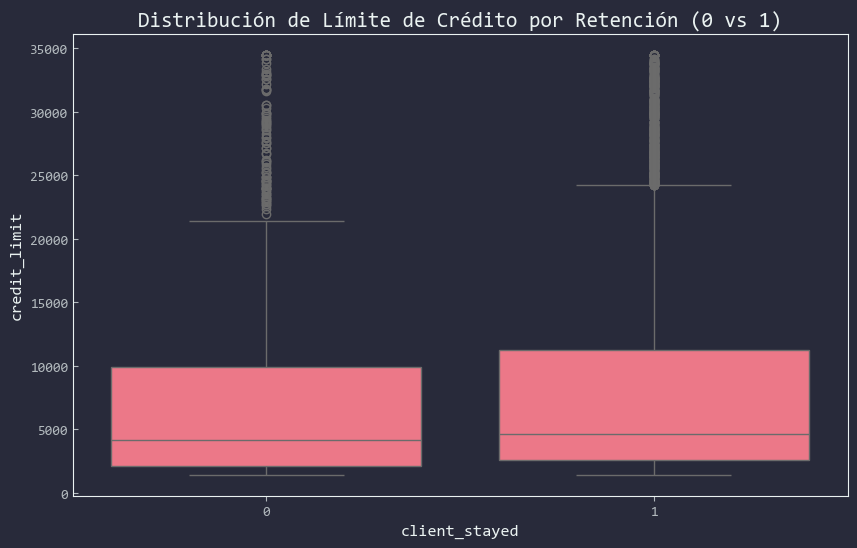

In [223]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='client_stayed', y='credit_limit')
plt.title("Distribución de Límite de Crédito por Retención (0 vs 1)")
plt.show()

In [224]:
#Revisaremos el tipo de variables que tenemos en el dataframe para saber que tipo de imputacion harémos para cada colummna
#Revisamos en el dataframe:
df.head(10)
###Primero las numéricas_discretas.
#Tenemos outliers en la columna 'customer_age',son pocos sin embargo los existen, detectamos que es una variable numérica discreta por lo que sustituiremos esos valores por moda
#Tenemos outliers en la columna 'months_on_book' detectamos que es una variable numérica discreta por lo que sustituiremos esos valores por moda
#Tenemos outliers en la columnda 'credit_limit' detectamos que es una variable numérica discreta por lo que sustituimos por la moda, en realidad tiene punto decimal, sin embargo esta en 0, entonces primero la convertiremos en entero
df['credit_limit'] = df['credit_limit'].astype(int)
#comprobamos el cambio 
df.dtypes
#Tenemos outliers en la columnda 'total_trans_amt' detectamos que es una variable numérica discreta por lo que sustituimos por la moda
##Tenemos outliers en la columna 'total_trans_ct',son pocos sin embargo los existen, detectamos que es una variable numérica discreta por lo que sustituiremos esos valores por moda
# Columnas a procesar (seleccionamos solo las numéricas)
columnas_numericas = ['customer_age', 'months_on_book', 'credit_limit','total_trans_amt','total_trans_ct']

for columna in columnas_numericas:
    # Calcular Q1, Q3 e IQR
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Límites para atípicos
    limite_inferior = Q1 - 3 * IQR
    limite_superior = Q3 + 3 * IQR
    
    # Calcular la moda (el más frecuente)
    moda = df[columna].mode()[0]
    
    # Reemplazar atípicos con la moda
    df[columna] = np.where(
        (df[columna] < limite_inferior) | (df[columna] > limite_superior),
        moda,
        df[columna]
    )






#print(df['credit_limit'].unique())

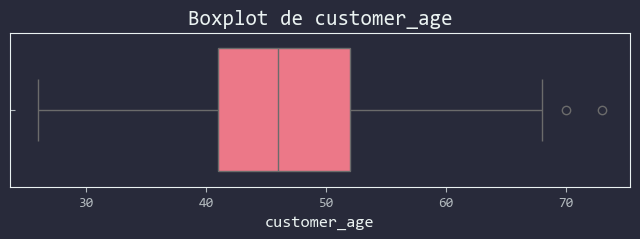

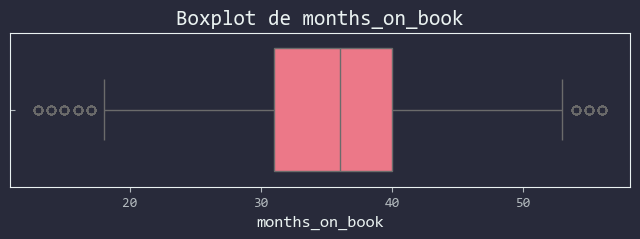

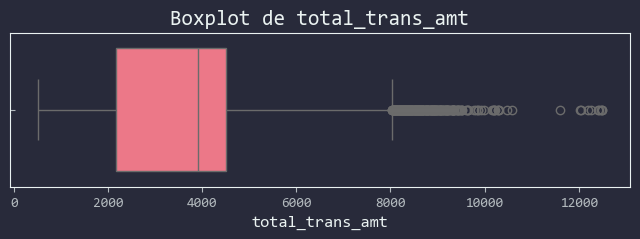

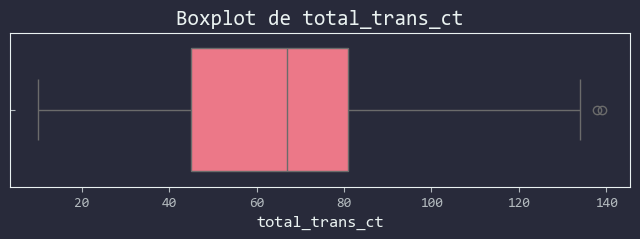

In [225]:
for col in columnas_numericas:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        plt.figure(figsize=(8, 2))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.xlabel(f'{col}')
        plt.show()
    else:
        continue

In [226]:

# Verificación

columnas_numericas = ['customer_age', 'months_on_book', 'credit_limit','total_trans_amt','total_trans_ct']

for columna in columnas_numericas:
    # Calcular Q1, Q3 e IQR
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Límites para atípicos
    limite_inferior = Q1 - 3 * IQR
    limite_superior = Q3 + 3 * IQR
    
    valor_reemplazo = df[columna].median()  # Mediana es 12.5 en este caso
    df[columna] = np.where(
        df[columna] > limite_superior,
        valor_reemplazo,
    df[columna]
)

print("Valores únicos después de reemplazo:", df[columna].unique())
print("¿Quedan outliers?", any(df[columna] > limite_superior))   


Valores únicos después de reemplazo: [ 42.  33.  20.  28.  24.  31.  36.  32.  26.  17.  29.  27.  21.  30.
  16.  18.  23.  22.  40.  38.  25.  43.  37.  19.  35.  15.  41.  57.
  12.  14.  34.  44.  13.  47.  10.  39.  53.  50.  52.  48.  49.  45.
  11.  55.  46.  54.  60.  51.  63.  58.  59.  61.  78.  64.  65.  62.
  67.  66.  56.  69.  71.  75.  74.  76.  84.  82.  88.  68.  70.  73.
  86.  72.  79.  80.  85.  81.  87.  83.  91.  89.  77. 103.  93.  96.
  99.  92.  90.  94.  95.  98. 100. 102.  97. 101. 104. 105. 106. 107.
 109. 118. 108. 122. 113. 112. 111. 127. 114. 124. 110. 120. 125. 121.
 117. 126. 134. 116. 119. 129. 131. 115. 128. 139. 123. 130. 138. 132.]
¿Quedan outliers? False


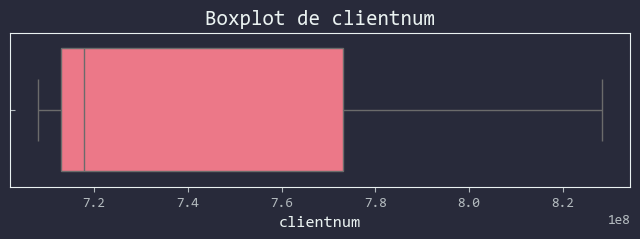

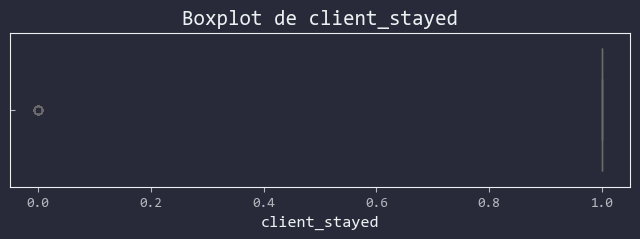

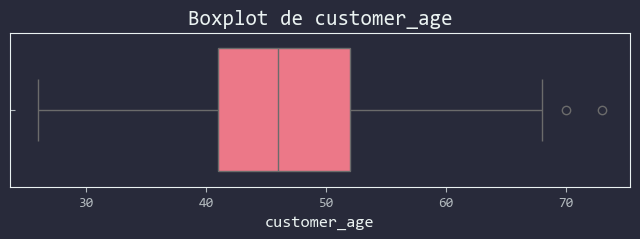

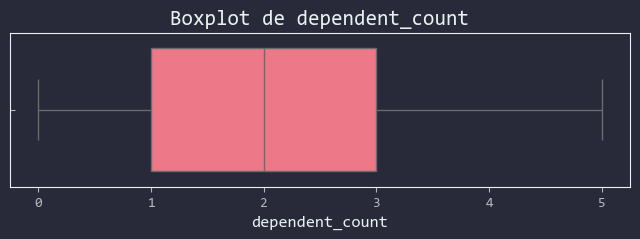

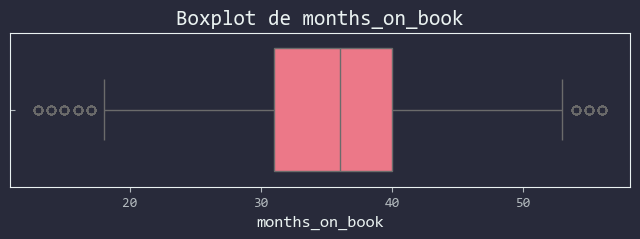

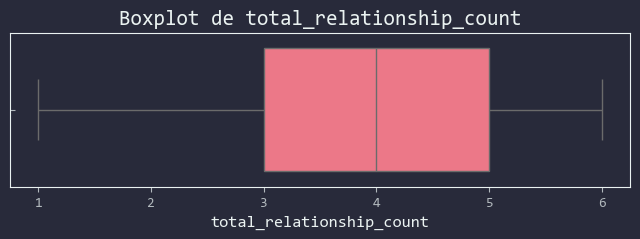

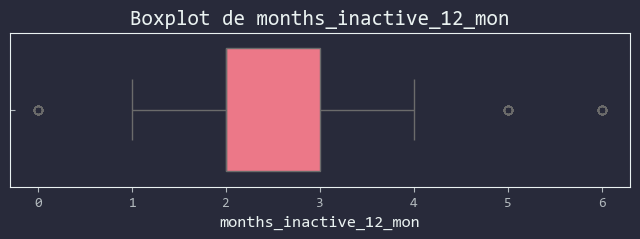

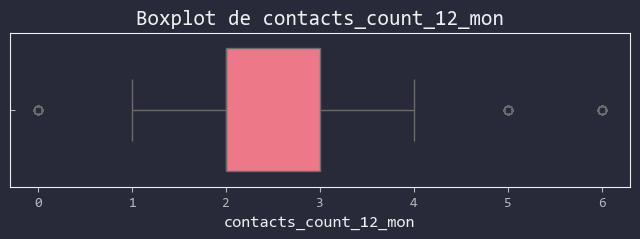

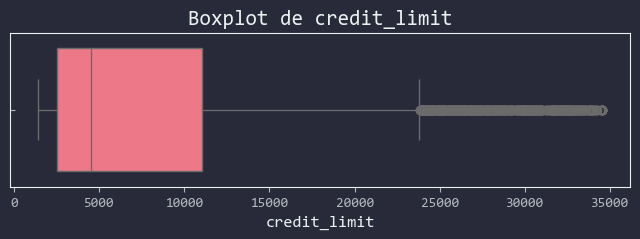

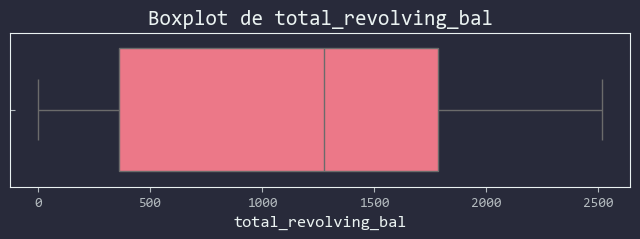

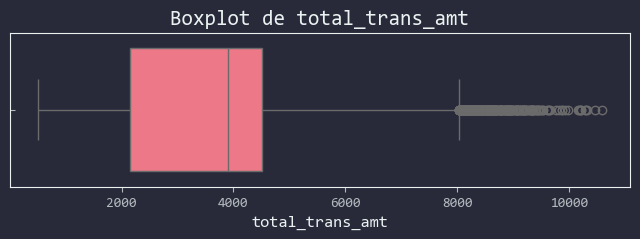

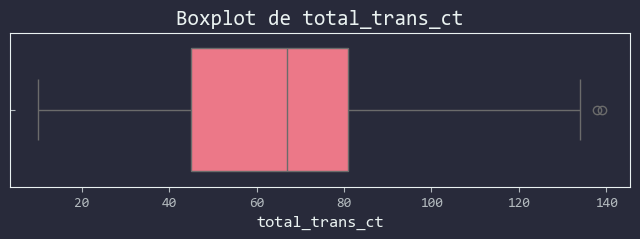

In [227]:
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        plt.figure(figsize=(8, 2))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.xlabel(f'{col}')
        plt.show()
    else:
        continue

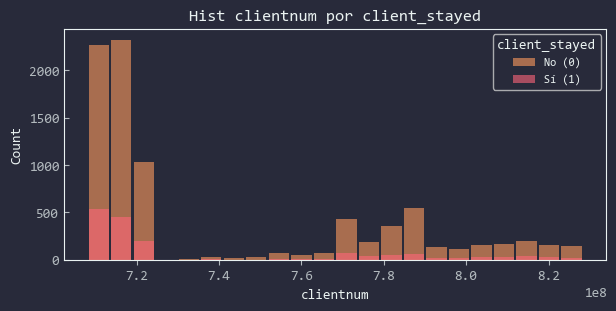

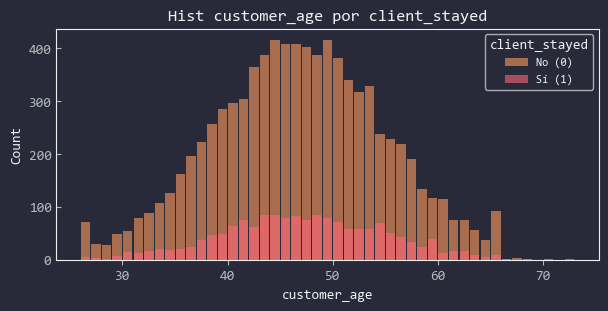

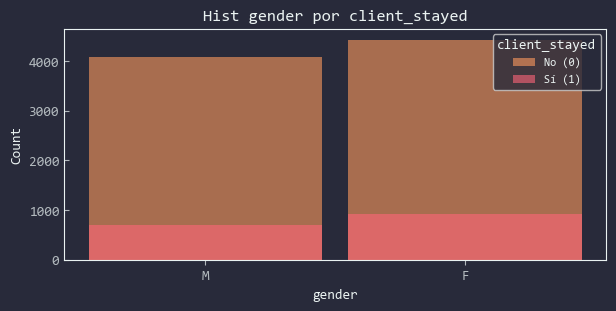

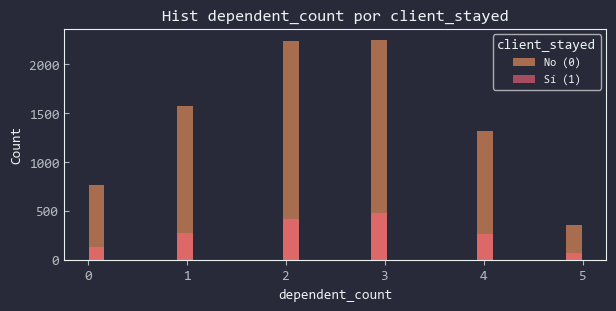

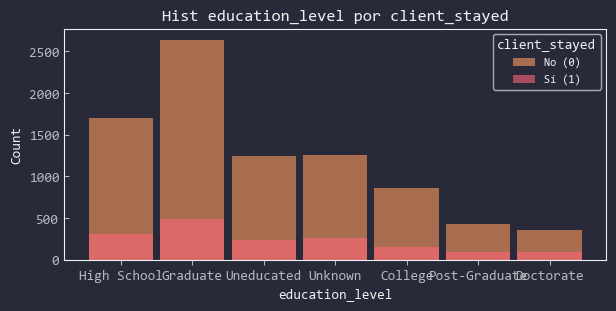

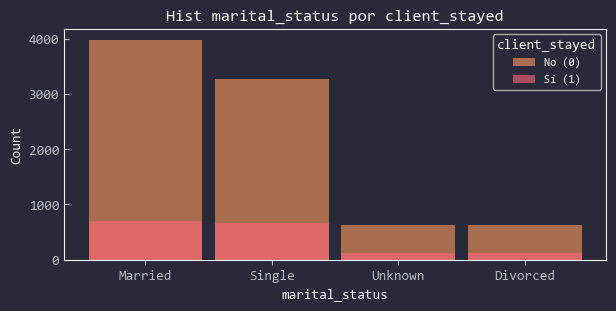

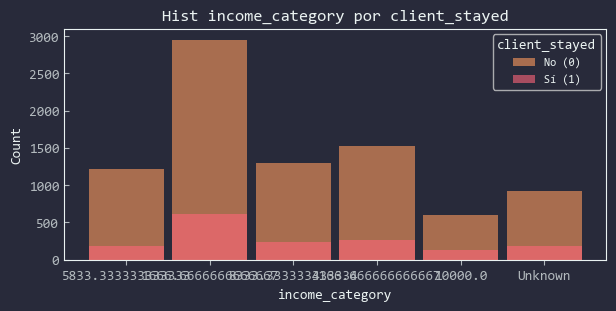

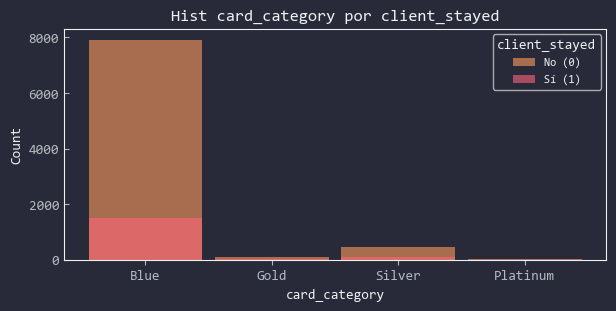

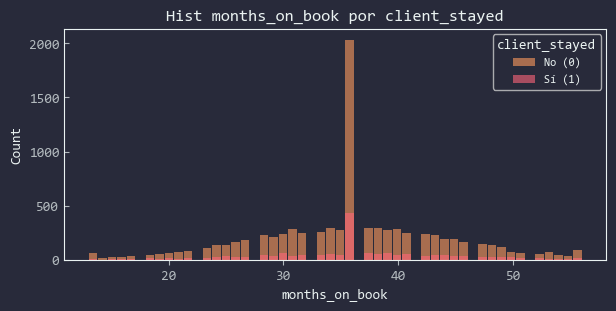

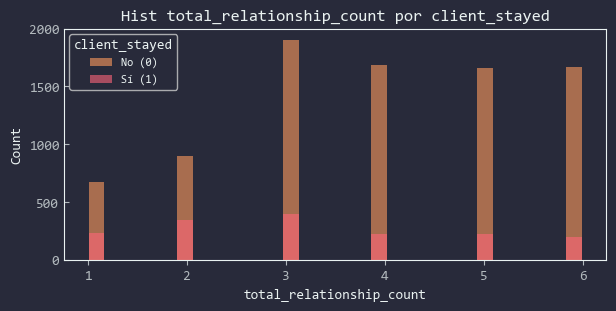

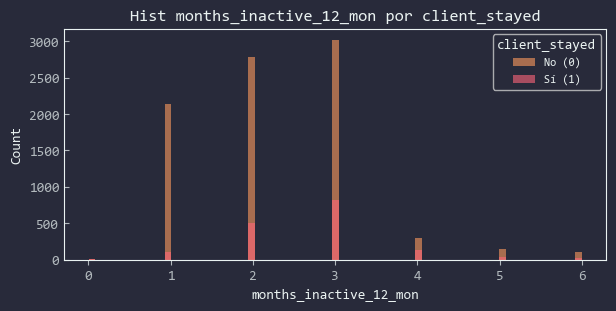

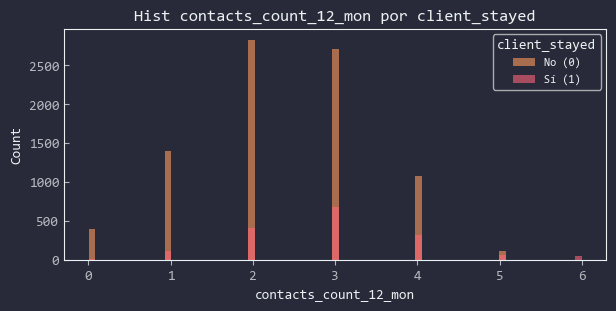

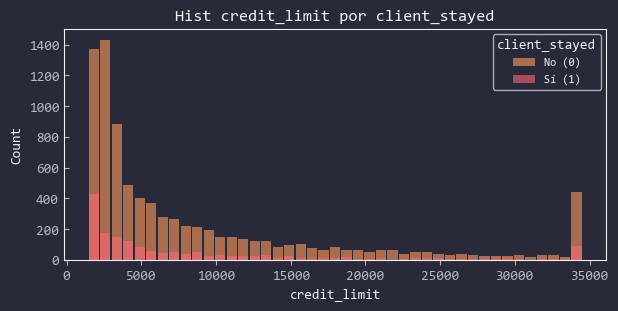

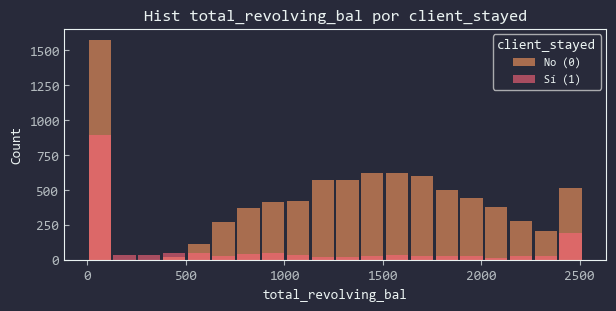

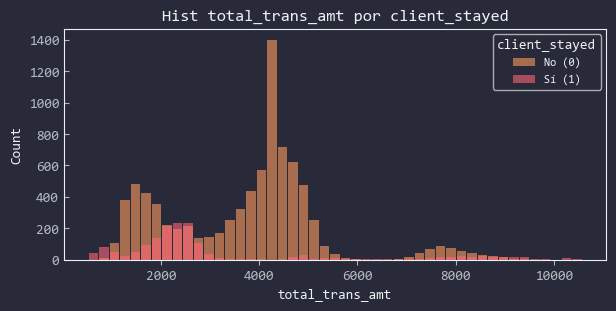

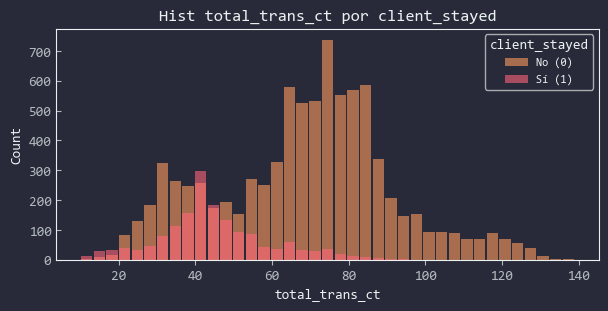

In [228]:
for column in df.columns:
    if column != 'client_stayed': 
        plt.figure(figsize=(7, 3))
        sns.histplot(
            data=df,
            x=column,
            hue='client_stayed',
            multiple='layer',  
            # kde=True,         
            alpha=0.6,        
            shrink=0.9,
            edgecolor='none',
        )
        plt.title(f'Hist {column} por client_stayed', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.legend(title='client_stayed', labels=['No (0)', 'Sí (1)'], fontsize=8)
        plt.show()

In [229]:
columnas_a_tratar = ['total_trans_ct', 'total_trans_amt', 'credit_limit', 'months_on_book', 'customer_age']

# Diccionario para guardar los resultados
resultados = {}

for columna in columnas_a_tratar:
    resultados[columna] = {
        'mean': df[columna].mean(),
        'median': df[columna].median(),
        'std': df[columna].std(),
        'mode': df[columna].mode().tolist()  # Convertir a lista por si hay múltiples modas
    }

# Convertir el diccionario a DataFrame para mejor visualización
df_resultados = pd.DataFrame(resultados).T  # Transponer para que las columnas sean las métricas
print(df_resultados)


                        mean  median          std       mode
total_trans_ct     64.858695    67.0     23.47257     [81.0]
total_trans_amt  3633.250815  3899.0   1745.58153   [4253.0]
credit_limit     8631.938679  4549.0  9088.788539  [34516.0]
months_on_book     35.928409    36.0     7.986416     [36.0]
customer_age        46.32596    46.0     8.016814     [44.0]


In [230]:
columna = "customer_age"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para customer_age:", outliers.shape[0])

columna = "months_on_book"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para months_on_book:", outliers.shape[0])


columna = "credit_limit"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para credit_limit:", outliers.shape[0])

columna = "total_trans_amt"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para total_trans_amt:", outliers.shape[0])

columna = "total_trans_ct"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para total_trans_ct:", outliers.shape[0])


Número de outliers para customer_age: 2
Número de outliers para months_on_book: 386
Número de outliers para credit_limit: 984
Número de outliers para total_trans_amt: 333
Número de outliers para total_trans_ct: 2


In [231]:
df.dtypes

clientnum                     int64
client_stayed                 int64
customer_age                float64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
income_category              object
card_category                object
months_on_book              float64
total_relationship_count      int64
months_inactive_12_mon        int64
contacts_count_12_mon         int64
credit_limit                float64
total_revolving_bal           int64
total_trans_amt             float64
total_trans_ct              float64
dtype: object

In [232]:
columnas_numericas = ['customer_age', 'months_on_book','total_trans_amt','total_trans_ct']

for columna in columnas_numericas:
    # Calcular Q1, Q3 e IQR
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Límites para atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Calcular la moda (el más frecuente)
    moda = df[columna].mode()[0]
    
    # Reemplazar atípicos con la moda
    df[columna] = np.where(
        (df[columna] < limite_inferior) | (df[columna] > limite_superior),
        moda,
        df[columna]
    )


In [233]:
Q1 = df['credit_limit'].quantile(0.25)
Q3 = df['credit_limit'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 3 * IQR  # Aumentamos el límite

# Paso 2: Reemplazar por la MEDIANA (evita usar moda si es outlier)
valor_reemplazo = df['credit_limit'].median()  # Mediana es 12.5 en este caso
df['credit_limit'] = np.where(
    df['credit_limit'] > limite_superior,
    valor_reemplazo,
    df['credit_limit']
)

# Verificación
print("Valores únicos después de reemplazo:", df['credit_limit'].unique())
print("¿Quedan outliers?", any(df['credit_limit'] > limite_superior))

Valores únicos después de reemplazo: [12691.  8256.  3418. ...  5409.  5281. 10388.]
¿Quedan outliers? False


In [234]:
columna = "customer_age"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para customer_age:", outliers.shape[0])

columna = "months_on_book"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para months_on_book:", outliers.shape[0])


columna = "credit_limit"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para credit_limit:", outliers.shape[0])

columna = "total_trans_amt"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para total_trans_amt:", outliers.shape[0])

columna = "total_trans_ct"

Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


print("Número de outliers para total_trans_ct:", outliers.shape[0])

Número de outliers para customer_age: 0
Número de outliers para months_on_book: 199
Número de outliers para credit_limit: 984
Número de outliers para total_trans_amt: 99
Número de outliers para total_trans_ct: 0


In [235]:
columnas_a_tratar = ['total_trans_ct', 'total_trans_amt', 'credit_limit', 'months_on_book', 'customer_age']

# Diccionario para guardar los resultados
resultados = {}

for columna in columnas_a_tratar:
    resultados[columna] = {
        'mean': df[columna].mean(),
        'median': df[columna].median(),
        'std': df[columna].std(),
        'mode': df[columna].mode().tolist()  # Convertir a lista por si hay múltiples modas
    }

# Convertir el diccionario a DataFrame para mejor visualización
df_resultados = pd.DataFrame(resultados).T  # Transponer para que las columnas sean las métricas
print(df_resultados)


                        mean  median          std       mode
total_trans_ct     64.847339    67.0    23.450837     [81.0]
total_trans_amt   3488.18268  3899.0  1482.300882   [4253.0]
credit_limit     8631.938679  4549.0  9088.788539  [34516.0]
months_on_book     35.946677    36.0     6.934324     [36.0]
customer_age       46.320529    46.0     8.009041     [44.0]
